##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# はじめてのニューラルネットワーク：分類問題の初歩

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org で表示</a></td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab</a>   </td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub でソースを表示</a> </td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">ノートブックをダウンロード</a> </td>
</table>

このガイドでは、スニーカーやシャツなど、身に着けるものの画像を分類するニューラルネットワークのモデルをトレーニングします。すべての詳細を理解できなくても問題ありません。ここでは、完全な TensorFlow プログラムについて概説し、細かいところはその過程において見ていきます。

このガイドでは、TensorFlowのモデルを構築し訓練するためのハイレベルのAPIである [tf.keras](https://www.tensorflow.org/guide/keras)を使用します。

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2022-12-15 00:31:21.895161: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-15 00:31:21.895268: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-15 00:31:21.895278: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


2.11.0


## Fashion MNIST データセットをインポートする

このガイドでは、[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) データセットを使用します。このデータセットには、10 カテゴリの 70,000 のグレースケール画像が含まれています。次のように、画像は低解像度（28 x 28 ピクセル）で個々の衣料品を示しています。

<table>
  <tr><td>     <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">   </td></tr>
  <tr><td align="center">     <b>図 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST サンプル</a> (作成者：Zalando、MIT ライセンス)<br> </td></tr>
</table>

Fashion MNISTは、画像処理のための機械学習での"Hello, World"としてしばしば登場する[MNIST](http://yann.lecun.com/exdb/mnist/) データセットの代替として開発されたものです。MNISTデータセットは手書きの数字（0, 1, 2 など）から構成されており、そのフォーマットはこれから使うFashion MNISTと全く同じです。

Fashion MNIST を使うのは、目先を変える意味もありますが、普通の MNIST よりも少しだけ手応えがあるからでもあります。どちらのデータセットも比較的小さく、アルゴリズムが期待したとおりに機能するかどうかを確認するために使われます。プログラムのテストやデバッグのためには、よい出発点になります。

ここでは、60,000 枚の画像を使用してネットワークをトレーニングし、10,000 枚の画像を使用して、ネットワークが画像の分類をどの程度正確に学習したかを評価します。Tensor Flow から直接 Fashion MNIST にアクセスできます。Tensor Flow から直接 [Fashion MNIST データをインポートして読み込みます](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)。

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

読み込んだデータセットは、NumPy 配列になります。

- `train_images` と `train_labels` の 2 つの配列は、モデルのトレーニングに使用される*トレーニング用データセット*です。
- モデルは、*テストセット*、`test_images`および`test_labels`  配列に対してテストされます。

画像は 28×28 の NumPy 配列から構成されています。それぞれのピクセルの値は 0 から 255 の間です。*ラベル*は、0 から 9 までの整数の配列です。それぞれの数字が下表のように、衣料品の*クラス*に対応しています。

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

画像はそれぞれ単一のラベルに分類されます。データセットには上記の**クラス名**が含まれていないため、後ほど画像を出力するときのために、クラス名を保存しておきます。

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## データの観察

モデルのトレーニングを行う前に、データセットの形式を見てみましょう。下記のように、トレーニング用データセットには 28 × 28 ピクセルの画像が 60,000 含まれています。

In [6]:
train_images.shape

(60000, 28, 28)

同様に、トレーニング用データセットには 60,000 のラベルが含まれています。

In [7]:
len(train_labels)

60000

ラベルはそれぞれ、0 から 9 までの間の整数です。

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

テスト用データセットには、10,000 の画像が含まれます。画像は 28 × 28 ピクセルで構成されています。

In [9]:
test_images.shape

(10000, 28, 28)

テスト用データセットには 10,000 のラベルが含まれます。

In [10]:
len(test_labels)

10000

## データの前処理

ネットワークをトレーニングする前に、データを前処理する必要があります。最初の画像を調べてみればわかるように、ピクセルの値は 0 から 255 の間の数値です。

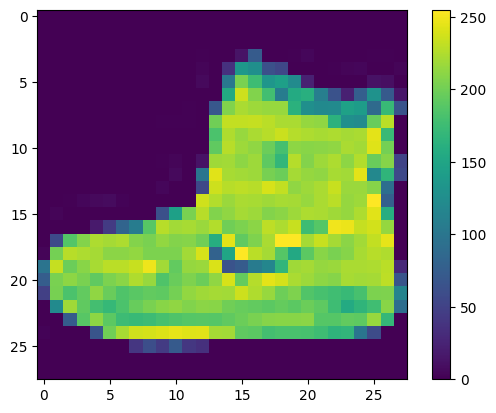

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

これらの値をニューラルネットワークモデルに供給する前に、0 から 1 の範囲にスケーリングします。これを行うには、値を 255 で割ります。*トレーニングセット*と*テストセット*を同じ方法で前処理することが重要です。

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**訓練用データセット**の最初の25枚の画像を、クラス名付きで表示してみましょう。ネットワークを構築・訓練する前に、データが正しいフォーマットになっていることを確認します。

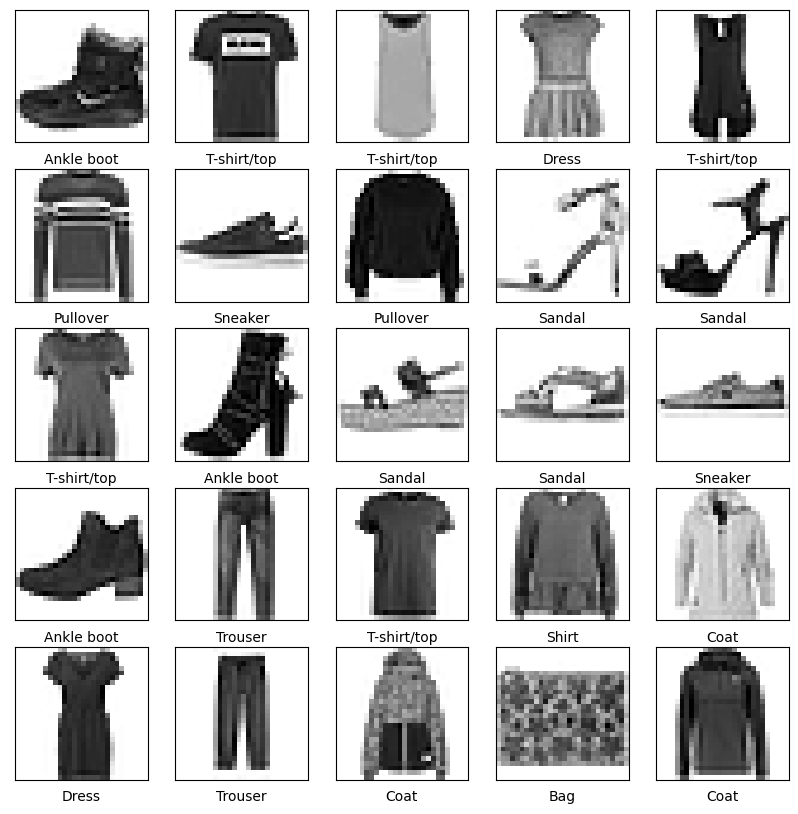

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## モデルの構築

ニューラルネットワークを構築するには、まずモデルのレイヤーを定義し、その後モデルをコンパイルします。

### レイヤーの設定

ニューラルネットワークの基本的な構成要素は、[*レイヤー*](https://www.tensorflow.org/api_docs/python/tf/keras/layers)です。レイヤーは、レイヤーに入力されたデータから表現を抽出します。 これらの表現は解決しようとする問題に有用であることが望まれます。

ディープラーニングモデルのほとんどは、単純なレイヤーの積み重ねで構成されています。`tf.keras.layers.Dense` のようなレイヤーのほとんどには、トレーニング中に学習されるパラメータが存在します。

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

このネットワークの最初のレイヤーは、`tf.keras.layers.Flatten` です。このレイヤーは、画像を（28 × 28 ピクセルの）2 次元配列から、28×28＝784 ピクセルの、1 次元配列に変換します。このレイヤーが、画像の中に積まれているピクセルの行を取り崩し、横に並べると考えてください。このレイヤーには学習すべきパラメータはなく、ただデータのフォーマット変換を行うだけです。

ピクセルが１次元化されたあと、ネットワークは 2 つの `tf.keras.layers.Dense` レイヤーとなります。これらのレイヤーは、密結合あるいは全結合されたニューロンのレイヤーとなります。最初の `Dense` レイヤーには、128 個のノード（あるはニューロン）があります。最後のレイヤーでもある 2 番めのレイヤーは、長さが 10 のロジット配列を返します。それぞれのノードは、今見ている画像が 10 個のクラスのひとつひとつに属する確率を出力します。

### モデルのコンパイル

モデルのトレーニングの準備が整う前に、さらにいくつかの設定が必要です。これらは、モデルの[*コンパイル*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)ステップ中に追加されます。

- [*損失関数*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —これは、トレーニング中のモデルの正解率を測定します。この関数を最小化して、モデルを正しい方向に「操縦」する必要があります。
- [*オプティマイザ*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —これは、モデルが表示するデータとその損失関数に基づいてモデルが更新される方法です。
- [*指標*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —トレーニングとテストの手順を監視するために使用されます。次の例では、正しく分類された画像の率である正解率を使用しています。

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## モデルの訓練

ニューラルネットワークモデルのトレーニングには、次の手順が必要です。

1. モデルトレーニング用データを投入します。この例では、トレーニングデータは `train_images` および <br>`train_labels` 配列にあります。
2. モデルは、画像とラベルの対応関係を学習します。
3. モデルにテスト用データセットの予測（分類）を行わせます。この例では `test_images` 配列です。その後、予測結果と `test_labels` 配列を照合します。
4. 予測が `test_labels` 配列のラベルと一致することを確認します。


### モデルに投入する

トレーニングを開始するには、[`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) メソッドを呼び出します。

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 42:05 - loss: 2.6907 - accuracy: 0.0000e+00

  24/1875 [..............................] - ETA: 4s - loss: 1.5299 - accuracy: 0.5182       

  48/1875 [..............................] - ETA: 3s - loss: 1.1985 - accuracy: 0.6133

  72/1875 [>.............................] - ETA: 3s - loss: 1.0636 - accuracy: 0.6562

  95/1875 [>.............................] - ETA: 3s - loss: 0.9703 - accuracy: 0.6816

 118/1875 [>.............................] - ETA: 3s - loss: 0.9167 - accuracy: 0.6965

 142/1875 [=>............................] - ETA: 3s - loss: 0.8721 - accuracy: 0.7128

 166/1875 [=>............................] - ETA: 3s - loss: 0.8269 - accuracy: 0.7246

 189/1875 [==>...........................] - ETA: 3s - loss: 0.8015 - accuracy: 0.7321

 212/1875 [==>...........................] - ETA: 3s - loss: 0.7763 - accuracy: 0.7406

 236/1875 [==>...........................] - ETA: 3s - loss: 0.7554 - accuracy: 0.7455

 260/1875 [===>..........................] - ETA: 3s - loss: 0.7298 - accuracy: 0.7530

 284/1875 [===>..........................] - ETA: 3s - loss: 0.7159 - accuracy: 0.7572

 308/1875 [===>..........................] - ETA: 3s - loss: 0.7053 - accuracy: 0.7599

 332/1875 [====>.........................] - ETA: 3s - loss: 0.6945 - accuracy: 0.7640

 355/1875 [====>.........................] - ETA: 3s - loss: 0.6852 - accuracy: 0.7669

 378/1875 [=====>........................] - ETA: 3s - loss: 0.6754 - accuracy: 0.7698

 402/1875 [=====>........................] - ETA: 3s - loss: 0.6654 - accuracy: 0.7735

 425/1875 [=====>........................] - ETA: 3s - loss: 0.6612 - accuracy: 0.7752

 449/1875 [======>.......................] - ETA: 3s - loss: 0.6549 - accuracy: 0.7771

 473/1875 [======>.......................] - ETA: 3s - loss: 0.6478 - accuracy: 0.7789

 497/1875 [======>.......................] - ETA: 2s - loss: 0.6411 - accuracy: 0.7801

 521/1875 [=======>......................] - ETA: 2s - loss: 0.6370 - accuracy: 0.7817

 545/1875 [=======>......................] - ETA: 2s - loss: 0.6311 - accuracy: 0.7836

 569/1875 [========>.....................] - ETA: 2s - loss: 0.6244 - accuracy: 0.7859

 593/1875 [========>.....................] - ETA: 2s - loss: 0.6159 - accuracy: 0.7887

 616/1875 [========>.....................] - ETA: 2s - loss: 0.6121 - accuracy: 0.7895

 639/1875 [=========>....................] - ETA: 2s - loss: 0.6065 - accuracy: 0.7912

 663/1875 [=========>....................] - ETA: 2s - loss: 0.6036 - accuracy: 0.7914

 686/1875 [=========>....................] - ETA: 2s - loss: 0.5975 - accuracy: 0.7931

 710/1875 [==========>...................] - ETA: 2s - loss: 0.5919 - accuracy: 0.7942

 734/1875 [==========>...................] - ETA: 2s - loss: 0.5908 - accuracy: 0.7944

 757/1875 [===========>..................] - ETA: 2s - loss: 0.5856 - accuracy: 0.7962

 781/1875 [===========>..................] - ETA: 2s - loss: 0.5808 - accuracy: 0.7975

 805/1875 [===========>..................] - ETA: 2s - loss: 0.5776 - accuracy: 0.7990

 829/1875 [============>.................] - ETA: 2s - loss: 0.5733 - accuracy: 0.8002

 853/1875 [============>.................] - ETA: 2s - loss: 0.5700 - accuracy: 0.8016

 876/1875 [=============>................] - ETA: 2s - loss: 0.5681 - accuracy: 0.8019

 900/1875 [=============>................] - ETA: 2s - loss: 0.5686 - accuracy: 0.8018

 924/1875 [=============>................] - ETA: 2s - loss: 0.5655 - accuracy: 0.8031

 947/1875 [==============>...............] - ETA: 2s - loss: 0.5644 - accuracy: 0.8033

 971/1875 [==============>...............] - ETA: 1s - loss: 0.5627 - accuracy: 0.8040

 995/1875 [==============>...............] - ETA: 1s - loss: 0.5604 - accuracy: 0.8045

1018/1875 [===============>..............] - ETA: 1s - loss: 0.5571 - accuracy: 0.8058

1041/1875 [===============>..............] - ETA: 1s - loss: 0.5548 - accuracy: 0.8067

1064/1875 [================>.............] - ETA: 1s - loss: 0.5532 - accuracy: 0.8074

1088/1875 [================>.............] - ETA: 1s - loss: 0.5506 - accuracy: 0.8081

1112/1875 [================>.............] - ETA: 1s - loss: 0.5471 - accuracy: 0.8092

1135/1875 [=================>............] - ETA: 1s - loss: 0.5453 - accuracy: 0.8098

1158/1875 [=================>............] - ETA: 1s - loss: 0.5439 - accuracy: 0.8103

1181/1875 [=================>............] - ETA: 1s - loss: 0.5421 - accuracy: 0.8109

1204/1875 [==================>...........] - ETA: 1s - loss: 0.5406 - accuracy: 0.8115

1227/1875 [==================>...........] - ETA: 1s - loss: 0.5388 - accuracy: 0.8120

1249/1875 [==================>...........] - ETA: 1s - loss: 0.5364 - accuracy: 0.8129

1272/1875 [===================>..........] - ETA: 1s - loss: 0.5343 - accuracy: 0.8137

1295/1875 [===================>..........] - ETA: 1s - loss: 0.5327 - accuracy: 0.8143

1318/1875 [====================>.........] - ETA: 1s - loss: 0.5308 - accuracy: 0.8151

1341/1875 [====================>.........] - ETA: 1s - loss: 0.5297 - accuracy: 0.8156

1364/1875 [====================>.........] - ETA: 1s - loss: 0.5280 - accuracy: 0.8162

1386/1875 [=====================>........] - ETA: 1s - loss: 0.5266 - accuracy: 0.8168

1409/1875 [=====================>........] - ETA: 1s - loss: 0.5250 - accuracy: 0.8174

1433/1875 [=====================>........] - ETA: 0s - loss: 0.5244 - accuracy: 0.8178

1456/1875 [======================>.......] - ETA: 0s - loss: 0.5231 - accuracy: 0.8181

1479/1875 [======================>.......] - ETA: 0s - loss: 0.5219 - accuracy: 0.8183

1501/1875 [=======================>......] - ETA: 0s - loss: 0.5211 - accuracy: 0.8186

1524/1875 [=======================>......] - ETA: 0s - loss: 0.5195 - accuracy: 0.8192

1547/1875 [=======================>......] - ETA: 0s - loss: 0.5184 - accuracy: 0.8196

1569/1875 [========================>.....] - ETA: 0s - loss: 0.5174 - accuracy: 0.8199

1591/1875 [========================>.....] - ETA: 0s - loss: 0.5159 - accuracy: 0.8203

1613/1875 [========================>.....] - ETA: 0s - loss: 0.5145 - accuracy: 0.8206

1637/1875 [=========================>....] - ETA: 0s - loss: 0.5132 - accuracy: 0.8210

1661/1875 [=========================>....] - ETA: 0s - loss: 0.5122 - accuracy: 0.8213

1685/1875 [=========================>....] - ETA: 0s - loss: 0.5112 - accuracy: 0.8217

1708/1875 [==========================>...] - ETA: 0s - loss: 0.5101 - accuracy: 0.8219

1731/1875 [==========================>...] - ETA: 0s - loss: 0.5089 - accuracy: 0.8222

1755/1875 [===========================>..] - ETA: 0s - loss: 0.5083 - accuracy: 0.8223

1778/1875 [===========================>..] - ETA: 0s - loss: 0.5071 - accuracy: 0.8226

1801/1875 [===========================>..] - ETA: 0s - loss: 0.5056 - accuracy: 0.8231

1825/1875 [============================>.] - ETA: 0s - loss: 0.5046 - accuracy: 0.8234

1849/1875 [============================>.] - ETA: 0s - loss: 0.5032 - accuracy: 0.8238

1873/1875 [============================>.] - ETA: 0s - loss: 0.5022 - accuracy: 0.8240

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5022 - accuracy: 0.8239


Epoch 2/10


   1/1875 [..............................] - ETA: 5s - loss: 0.5548 - accuracy: 0.8125

  25/1875 [..............................] - ETA: 3s - loss: 0.3805 - accuracy: 0.8750

  48/1875 [..............................] - ETA: 3s - loss: 0.3969 - accuracy: 0.8685

  71/1875 [>.............................] - ETA: 3s - loss: 0.3827 - accuracy: 0.8706

  94/1875 [>.............................] - ETA: 3s - loss: 0.3901 - accuracy: 0.8707

 116/1875 [>.............................] - ETA: 3s - loss: 0.3863 - accuracy: 0.8680

 139/1875 [=>............................] - ETA: 3s - loss: 0.3760 - accuracy: 0.8716

 162/1875 [=>............................] - ETA: 3s - loss: 0.3714 - accuracy: 0.8721

 186/1875 [=>............................] - ETA: 3s - loss: 0.3760 - accuracy: 0.8690

 209/1875 [==>...........................] - ETA: 3s - loss: 0.3787 - accuracy: 0.8663

 233/1875 [==>...........................] - ETA: 3s - loss: 0.3764 - accuracy: 0.8663

 257/1875 [===>..........................] - ETA: 3s - loss: 0.3820 - accuracy: 0.8628

 280/1875 [===>..........................] - ETA: 3s - loss: 0.3806 - accuracy: 0.8646

 304/1875 [===>..........................] - ETA: 3s - loss: 0.3874 - accuracy: 0.8629

 328/1875 [====>.........................] - ETA: 3s - loss: 0.3876 - accuracy: 0.8627

 352/1875 [====>.........................] - ETA: 3s - loss: 0.3859 - accuracy: 0.8631

 375/1875 [=====>........................] - ETA: 3s - loss: 0.3879 - accuracy: 0.8626

 398/1875 [=====>........................] - ETA: 3s - loss: 0.3862 - accuracy: 0.8628

 421/1875 [=====>........................] - ETA: 3s - loss: 0.3868 - accuracy: 0.8627

 445/1875 [======>.......................] - ETA: 3s - loss: 0.3850 - accuracy: 0.8638

 469/1875 [======>.......................] - ETA: 3s - loss: 0.3835 - accuracy: 0.8642

 493/1875 [======>.......................] - ETA: 3s - loss: 0.3831 - accuracy: 0.8644

 516/1875 [=======>......................] - ETA: 2s - loss: 0.3842 - accuracy: 0.8638

 540/1875 [=======>......................] - ETA: 2s - loss: 0.3837 - accuracy: 0.8642

 564/1875 [========>.....................] - ETA: 2s - loss: 0.3820 - accuracy: 0.8639

 588/1875 [========>.....................] - ETA: 2s - loss: 0.3832 - accuracy: 0.8632

 612/1875 [========>.....................] - ETA: 2s - loss: 0.3816 - accuracy: 0.8638

 636/1875 [=========>....................] - ETA: 2s - loss: 0.3831 - accuracy: 0.8633

 660/1875 [=========>....................] - ETA: 2s - loss: 0.3827 - accuracy: 0.8634

 683/1875 [=========>....................] - ETA: 2s - loss: 0.3835 - accuracy: 0.8629

 706/1875 [==========>...................] - ETA: 2s - loss: 0.3831 - accuracy: 0.8631

 730/1875 [==========>...................] - ETA: 2s - loss: 0.3835 - accuracy: 0.8628

 754/1875 [===========>..................] - ETA: 2s - loss: 0.3829 - accuracy: 0.8630

 777/1875 [===========>..................] - ETA: 2s - loss: 0.3833 - accuracy: 0.8629

 801/1875 [===========>..................] - ETA: 2s - loss: 0.3827 - accuracy: 0.8633

 825/1875 [============>.................] - ETA: 2s - loss: 0.3806 - accuracy: 0.8642

 849/1875 [============>.................] - ETA: 2s - loss: 0.3813 - accuracy: 0.8640

 873/1875 [============>.................] - ETA: 2s - loss: 0.3801 - accuracy: 0.8644

 897/1875 [=============>................] - ETA: 2s - loss: 0.3809 - accuracy: 0.8642

 921/1875 [=============>................] - ETA: 2s - loss: 0.3803 - accuracy: 0.8643

 945/1875 [==============>...............] - ETA: 2s - loss: 0.3792 - accuracy: 0.8644

 969/1875 [==============>...............] - ETA: 1s - loss: 0.3795 - accuracy: 0.8645

 993/1875 [==============>...............] - ETA: 1s - loss: 0.3792 - accuracy: 0.8641

1017/1875 [===============>..............] - ETA: 1s - loss: 0.3783 - accuracy: 0.8646

1041/1875 [===============>..............] - ETA: 1s - loss: 0.3792 - accuracy: 0.8647

1064/1875 [================>.............] - ETA: 1s - loss: 0.3794 - accuracy: 0.8644

1087/1875 [================>.............] - ETA: 1s - loss: 0.3805 - accuracy: 0.8637

1110/1875 [================>.............] - ETA: 1s - loss: 0.3806 - accuracy: 0.8634

1133/1875 [=================>............] - ETA: 1s - loss: 0.3799 - accuracy: 0.8636

1157/1875 [=================>............] - ETA: 1s - loss: 0.3799 - accuracy: 0.8637

1181/1875 [=================>............] - ETA: 1s - loss: 0.3796 - accuracy: 0.8639

1204/1875 [==================>...........] - ETA: 1s - loss: 0.3794 - accuracy: 0.8641

1228/1875 [==================>...........] - ETA: 1s - loss: 0.3795 - accuracy: 0.8640

1251/1875 [===================>..........] - ETA: 1s - loss: 0.3792 - accuracy: 0.8642

1274/1875 [===================>..........] - ETA: 1s - loss: 0.3790 - accuracy: 0.8640

1298/1875 [===================>..........] - ETA: 1s - loss: 0.3790 - accuracy: 0.8636

1322/1875 [====================>.........] - ETA: 1s - loss: 0.3794 - accuracy: 0.8636

1346/1875 [====================>.........] - ETA: 1s - loss: 0.3787 - accuracy: 0.8638

1370/1875 [====================>.........] - ETA: 1s - loss: 0.3785 - accuracy: 0.8640

1394/1875 [=====================>........] - ETA: 1s - loss: 0.3781 - accuracy: 0.8639

1418/1875 [=====================>........] - ETA: 0s - loss: 0.3777 - accuracy: 0.8642

1442/1875 [======================>.......] - ETA: 0s - loss: 0.3773 - accuracy: 0.8643

1465/1875 [======================>.......] - ETA: 0s - loss: 0.3768 - accuracy: 0.8645

1488/1875 [======================>.......] - ETA: 0s - loss: 0.3773 - accuracy: 0.8642

1512/1875 [=======================>......] - ETA: 0s - loss: 0.3770 - accuracy: 0.8641

1536/1875 [=======================>......] - ETA: 0s - loss: 0.3784 - accuracy: 0.8635

1560/1875 [=======================>......] - ETA: 0s - loss: 0.3793 - accuracy: 0.8633

1585/1875 [========================>.....] - ETA: 0s - loss: 0.3788 - accuracy: 0.8633

1609/1875 [========================>.....] - ETA: 0s - loss: 0.3791 - accuracy: 0.8629

1634/1875 [=========================>....] - ETA: 0s - loss: 0.3793 - accuracy: 0.8630

1658/1875 [=========================>....] - ETA: 0s - loss: 0.3791 - accuracy: 0.8633

1682/1875 [=========================>....] - ETA: 0s - loss: 0.3791 - accuracy: 0.8633

1706/1875 [==========================>...] - ETA: 0s - loss: 0.3801 - accuracy: 0.8627

1730/1875 [==========================>...] - ETA: 0s - loss: 0.3801 - accuracy: 0.8628

1753/1875 [===========================>..] - ETA: 0s - loss: 0.3804 - accuracy: 0.8629

1777/1875 [===========================>..] - ETA: 0s - loss: 0.3797 - accuracy: 0.8630

1801/1875 [===========================>..] - ETA: 0s - loss: 0.3787 - accuracy: 0.8634

1825/1875 [============================>.] - ETA: 0s - loss: 0.3786 - accuracy: 0.8635

1849/1875 [============================>.] - ETA: 0s - loss: 0.3783 - accuracy: 0.8636

1872/1875 [============================>.] - ETA: 0s - loss: 0.3783 - accuracy: 0.8636

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3784 - accuracy: 0.8636


Epoch 3/10


   1/1875 [..............................] - ETA: 4s - loss: 0.7461 - accuracy: 0.7500

  25/1875 [..............................] - ETA: 3s - loss: 0.3887 - accuracy: 0.8450

  49/1875 [..............................] - ETA: 3s - loss: 0.3797 - accuracy: 0.8552

  72/1875 [>.............................] - ETA: 3s - loss: 0.3707 - accuracy: 0.8585

  95/1875 [>.............................] - ETA: 3s - loss: 0.3707 - accuracy: 0.8609

 118/1875 [>.............................] - ETA: 3s - loss: 0.3593 - accuracy: 0.8652

 142/1875 [=>............................] - ETA: 3s - loss: 0.3565 - accuracy: 0.8671

 166/1875 [=>............................] - ETA: 3s - loss: 0.3528 - accuracy: 0.8682

 190/1875 [==>...........................] - ETA: 3s - loss: 0.3598 - accuracy: 0.8683

 215/1875 [==>...........................] - ETA: 3s - loss: 0.3561 - accuracy: 0.8701

 239/1875 [==>...........................] - ETA: 3s - loss: 0.3579 - accuracy: 0.8703

 264/1875 [===>..........................] - ETA: 3s - loss: 0.3563 - accuracy: 0.8709

 288/1875 [===>..........................] - ETA: 3s - loss: 0.3524 - accuracy: 0.8720

 312/1875 [===>..........................] - ETA: 3s - loss: 0.3535 - accuracy: 0.8716

 337/1875 [====>.........................] - ETA: 3s - loss: 0.3536 - accuracy: 0.8725

 362/1875 [====>.........................] - ETA: 3s - loss: 0.3528 - accuracy: 0.8717

 386/1875 [=====>........................] - ETA: 3s - loss: 0.3529 - accuracy: 0.8714

 411/1875 [=====>........................] - ETA: 3s - loss: 0.3507 - accuracy: 0.8727

 436/1875 [=====>........................] - ETA: 3s - loss: 0.3487 - accuracy: 0.8736

 461/1875 [======>.......................] - ETA: 2s - loss: 0.3491 - accuracy: 0.8736

 486/1875 [======>.......................] - ETA: 2s - loss: 0.3476 - accuracy: 0.8745

 511/1875 [=======>......................] - ETA: 2s - loss: 0.3463 - accuracy: 0.8745

 535/1875 [=======>......................] - ETA: 2s - loss: 0.3466 - accuracy: 0.8746

 559/1875 [=======>......................] - ETA: 2s - loss: 0.3454 - accuracy: 0.8747

 584/1875 [========>.....................] - ETA: 2s - loss: 0.3431 - accuracy: 0.8751

 608/1875 [========>.....................] - ETA: 2s - loss: 0.3424 - accuracy: 0.8754

 633/1875 [=========>....................] - ETA: 2s - loss: 0.3433 - accuracy: 0.8742

 658/1875 [=========>....................] - ETA: 2s - loss: 0.3436 - accuracy: 0.8738

 683/1875 [=========>....................] - ETA: 2s - loss: 0.3421 - accuracy: 0.8739

 707/1875 [==========>...................] - ETA: 2s - loss: 0.3404 - accuracy: 0.8746

 731/1875 [==========>...................] - ETA: 2s - loss: 0.3403 - accuracy: 0.8747

 755/1875 [===========>..................] - ETA: 2s - loss: 0.3390 - accuracy: 0.8753

 779/1875 [===========>..................] - ETA: 2s - loss: 0.3394 - accuracy: 0.8754

 804/1875 [===========>..................] - ETA: 2s - loss: 0.3405 - accuracy: 0.8750

 829/1875 [============>.................] - ETA: 2s - loss: 0.3403 - accuracy: 0.8754

 854/1875 [============>.................] - ETA: 2s - loss: 0.3410 - accuracy: 0.8753

 879/1875 [=============>................] - ETA: 2s - loss: 0.3417 - accuracy: 0.8748

 904/1875 [=============>................] - ETA: 2s - loss: 0.3424 - accuracy: 0.8742

 928/1875 [=============>................] - ETA: 1s - loss: 0.3425 - accuracy: 0.8740

 952/1875 [==============>...............] - ETA: 1s - loss: 0.3429 - accuracy: 0.8740

 976/1875 [==============>...............] - ETA: 1s - loss: 0.3428 - accuracy: 0.8738

1001/1875 [===============>..............] - ETA: 1s - loss: 0.3428 - accuracy: 0.8736

1026/1875 [===============>..............] - ETA: 1s - loss: 0.3439 - accuracy: 0.8733

1051/1875 [===============>..............] - ETA: 1s - loss: 0.3437 - accuracy: 0.8734

1075/1875 [================>.............] - ETA: 1s - loss: 0.3428 - accuracy: 0.8734

1099/1875 [================>.............] - ETA: 1s - loss: 0.3439 - accuracy: 0.8730

1123/1875 [================>.............] - ETA: 1s - loss: 0.3432 - accuracy: 0.8733

1148/1875 [=================>............] - ETA: 1s - loss: 0.3428 - accuracy: 0.8734

1172/1875 [=================>............] - ETA: 1s - loss: 0.3423 - accuracy: 0.8735

1196/1875 [==================>...........] - ETA: 1s - loss: 0.3427 - accuracy: 0.8736

1219/1875 [==================>...........] - ETA: 1s - loss: 0.3426 - accuracy: 0.8738

1243/1875 [==================>...........] - ETA: 1s - loss: 0.3427 - accuracy: 0.8738

1267/1875 [===================>..........] - ETA: 1s - loss: 0.3424 - accuracy: 0.8738

1291/1875 [===================>..........] - ETA: 1s - loss: 0.3423 - accuracy: 0.8739

1315/1875 [====================>.........] - ETA: 1s - loss: 0.3423 - accuracy: 0.8740

1339/1875 [====================>.........] - ETA: 1s - loss: 0.3419 - accuracy: 0.8743

1363/1875 [====================>.........] - ETA: 1s - loss: 0.3418 - accuracy: 0.8743

1387/1875 [=====================>........] - ETA: 1s - loss: 0.3413 - accuracy: 0.8744

1411/1875 [=====================>........] - ETA: 0s - loss: 0.3410 - accuracy: 0.8745

1434/1875 [=====================>........] - ETA: 0s - loss: 0.3409 - accuracy: 0.8747

1458/1875 [======================>.......] - ETA: 0s - loss: 0.3413 - accuracy: 0.8744

1482/1875 [======================>.......] - ETA: 0s - loss: 0.3421 - accuracy: 0.8741

1506/1875 [=======================>......] - ETA: 0s - loss: 0.3421 - accuracy: 0.8739

1530/1875 [=======================>......] - ETA: 0s - loss: 0.3419 - accuracy: 0.8741

1554/1875 [=======================>......] - ETA: 0s - loss: 0.3424 - accuracy: 0.8741

1577/1875 [========================>.....] - ETA: 0s - loss: 0.3426 - accuracy: 0.8743

1600/1875 [========================>.....] - ETA: 0s - loss: 0.3431 - accuracy: 0.8742

1624/1875 [========================>.....] - ETA: 0s - loss: 0.3431 - accuracy: 0.8741

1648/1875 [=========================>....] - ETA: 0s - loss: 0.3426 - accuracy: 0.8741

1671/1875 [=========================>....] - ETA: 0s - loss: 0.3422 - accuracy: 0.8745

1695/1875 [==========================>...] - ETA: 0s - loss: 0.3420 - accuracy: 0.8746

1719/1875 [==========================>...] - ETA: 0s - loss: 0.3423 - accuracy: 0.8743

1743/1875 [==========================>...] - ETA: 0s - loss: 0.3426 - accuracy: 0.8743

1767/1875 [===========================>..] - ETA: 0s - loss: 0.3422 - accuracy: 0.8744

1791/1875 [===========================>..] - ETA: 0s - loss: 0.3424 - accuracy: 0.8743

1815/1875 [============================>.] - ETA: 0s - loss: 0.3429 - accuracy: 0.8741

1839/1875 [============================>.] - ETA: 0s - loss: 0.3422 - accuracy: 0.8744

1863/1875 [============================>.] - ETA: 0s - loss: 0.3422 - accuracy: 0.8744

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3419 - accuracy: 0.8745


Epoch 4/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2448 - accuracy: 0.9688

  24/1875 [..............................] - ETA: 4s - loss: 0.2469 - accuracy: 0.9167

  47/1875 [..............................] - ETA: 4s - loss: 0.3021 - accuracy: 0.8930

  70/1875 [>.............................] - ETA: 4s - loss: 0.3026 - accuracy: 0.8960

  93/1875 [>.............................] - ETA: 3s - loss: 0.3078 - accuracy: 0.8925

 117/1875 [>.............................] - ETA: 3s - loss: 0.3139 - accuracy: 0.8894

 141/1875 [=>............................] - ETA: 3s - loss: 0.3129 - accuracy: 0.8892

 164/1875 [=>............................] - ETA: 3s - loss: 0.3085 - accuracy: 0.8914

 187/1875 [=>............................] - ETA: 3s - loss: 0.3101 - accuracy: 0.8902

 211/1875 [==>...........................] - ETA: 3s - loss: 0.3132 - accuracy: 0.8889

 236/1875 [==>...........................] - ETA: 3s - loss: 0.3144 - accuracy: 0.8870

 260/1875 [===>..........................] - ETA: 3s - loss: 0.3147 - accuracy: 0.8871

 284/1875 [===>..........................] - ETA: 3s - loss: 0.3137 - accuracy: 0.8856

 309/1875 [===>..........................] - ETA: 3s - loss: 0.3158 - accuracy: 0.8854

 334/1875 [====>.........................] - ETA: 3s - loss: 0.3124 - accuracy: 0.8859

 359/1875 [====>.........................] - ETA: 3s - loss: 0.3154 - accuracy: 0.8851

 383/1875 [=====>........................] - ETA: 3s - loss: 0.3168 - accuracy: 0.8841

 407/1875 [=====>........................] - ETA: 3s - loss: 0.3180 - accuracy: 0.8841

 431/1875 [=====>........................] - ETA: 3s - loss: 0.3199 - accuracy: 0.8835

 455/1875 [======>.......................] - ETA: 3s - loss: 0.3202 - accuracy: 0.8830

 479/1875 [======>.......................] - ETA: 2s - loss: 0.3212 - accuracy: 0.8826

 503/1875 [=======>......................] - ETA: 2s - loss: 0.3228 - accuracy: 0.8821

 526/1875 [=======>......................] - ETA: 2s - loss: 0.3234 - accuracy: 0.8814

 550/1875 [=======>......................] - ETA: 2s - loss: 0.3218 - accuracy: 0.8823

 575/1875 [========>.....................] - ETA: 2s - loss: 0.3232 - accuracy: 0.8825

 601/1875 [========>.....................] - ETA: 2s - loss: 0.3238 - accuracy: 0.8824

 625/1875 [=========>....................] - ETA: 2s - loss: 0.3249 - accuracy: 0.8820

 649/1875 [=========>....................] - ETA: 2s - loss: 0.3242 - accuracy: 0.8824

 673/1875 [=========>....................] - ETA: 2s - loss: 0.3249 - accuracy: 0.8824

 698/1875 [==========>...................] - ETA: 2s - loss: 0.3250 - accuracy: 0.8823

 723/1875 [==========>...................] - ETA: 2s - loss: 0.3248 - accuracy: 0.8823

 747/1875 [==========>...................] - ETA: 2s - loss: 0.3238 - accuracy: 0.8825

 772/1875 [===========>..................] - ETA: 2s - loss: 0.3247 - accuracy: 0.8820

 796/1875 [===========>..................] - ETA: 2s - loss: 0.3246 - accuracy: 0.8819

 820/1875 [============>.................] - ETA: 2s - loss: 0.3232 - accuracy: 0.8824

 844/1875 [============>.................] - ETA: 2s - loss: 0.3222 - accuracy: 0.8830

 868/1875 [============>.................] - ETA: 2s - loss: 0.3229 - accuracy: 0.8828

 893/1875 [=============>................] - ETA: 2s - loss: 0.3215 - accuracy: 0.8828

 918/1875 [=============>................] - ETA: 2s - loss: 0.3201 - accuracy: 0.8834

 942/1875 [==============>...............] - ETA: 1s - loss: 0.3199 - accuracy: 0.8836

 966/1875 [==============>...............] - ETA: 1s - loss: 0.3191 - accuracy: 0.8838

 990/1875 [==============>...............] - ETA: 1s - loss: 0.3185 - accuracy: 0.8840

1014/1875 [===============>..............] - ETA: 1s - loss: 0.3183 - accuracy: 0.8839

1037/1875 [===============>..............] - ETA: 1s - loss: 0.3183 - accuracy: 0.8835

1061/1875 [===============>..............] - ETA: 1s - loss: 0.3166 - accuracy: 0.8840

1085/1875 [================>.............] - ETA: 1s - loss: 0.3174 - accuracy: 0.8837

1108/1875 [================>.............] - ETA: 1s - loss: 0.3183 - accuracy: 0.8833

1131/1875 [=================>............] - ETA: 1s - loss: 0.3191 - accuracy: 0.8832

1154/1875 [=================>............] - ETA: 1s - loss: 0.3194 - accuracy: 0.8830

1177/1875 [=================>............] - ETA: 1s - loss: 0.3200 - accuracy: 0.8826

1200/1875 [==================>...........] - ETA: 1s - loss: 0.3199 - accuracy: 0.8829

1223/1875 [==================>...........] - ETA: 1s - loss: 0.3203 - accuracy: 0.8828

1246/1875 [==================>...........] - ETA: 1s - loss: 0.3212 - accuracy: 0.8826

1269/1875 [===================>..........] - ETA: 1s - loss: 0.3211 - accuracy: 0.8826

1292/1875 [===================>..........] - ETA: 1s - loss: 0.3210 - accuracy: 0.8825

1315/1875 [====================>.........] - ETA: 1s - loss: 0.3206 - accuracy: 0.8826

1338/1875 [====================>.........] - ETA: 1s - loss: 0.3205 - accuracy: 0.8823

1361/1875 [====================>.........] - ETA: 1s - loss: 0.3197 - accuracy: 0.8826

1384/1875 [=====================>........] - ETA: 1s - loss: 0.3198 - accuracy: 0.8827

1408/1875 [=====================>........] - ETA: 0s - loss: 0.3197 - accuracy: 0.8827

1432/1875 [=====================>........] - ETA: 0s - loss: 0.3195 - accuracy: 0.8827

1456/1875 [======================>.......] - ETA: 0s - loss: 0.3192 - accuracy: 0.8827

1479/1875 [======================>.......] - ETA: 0s - loss: 0.3192 - accuracy: 0.8827

1503/1875 [=======================>......] - ETA: 0s - loss: 0.3188 - accuracy: 0.8827

1527/1875 [=======================>......] - ETA: 0s - loss: 0.3189 - accuracy: 0.8827

1551/1875 [=======================>......] - ETA: 0s - loss: 0.3190 - accuracy: 0.8825

1575/1875 [========================>.....] - ETA: 0s - loss: 0.3183 - accuracy: 0.8826

1599/1875 [========================>.....] - ETA: 0s - loss: 0.3180 - accuracy: 0.8826

1622/1875 [========================>.....] - ETA: 0s - loss: 0.3176 - accuracy: 0.8827

1646/1875 [=========================>....] - ETA: 0s - loss: 0.3174 - accuracy: 0.8827

1669/1875 [=========================>....] - ETA: 0s - loss: 0.3173 - accuracy: 0.8828

1692/1875 [==========================>...] - ETA: 0s - loss: 0.3172 - accuracy: 0.8826

1716/1875 [==========================>...] - ETA: 0s - loss: 0.3168 - accuracy: 0.8830

1740/1875 [==========================>...] - ETA: 0s - loss: 0.3160 - accuracy: 0.8833

1764/1875 [===========================>..] - ETA: 0s - loss: 0.3157 - accuracy: 0.8835

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3162 - accuracy: 0.8833

1812/1875 [===========================>..] - ETA: 0s - loss: 0.3162 - accuracy: 0.8834

1836/1875 [============================>.] - ETA: 0s - loss: 0.3158 - accuracy: 0.8836

1860/1875 [============================>.] - ETA: 0s - loss: 0.3158 - accuracy: 0.8836

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3157 - accuracy: 0.8838


Epoch 5/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1672 - accuracy: 0.9375

  24/1875 [..............................] - ETA: 4s - loss: 0.2605 - accuracy: 0.8984

  48/1875 [..............................] - ETA: 3s - loss: 0.2845 - accuracy: 0.8932

  72/1875 [>.............................] - ETA: 3s - loss: 0.2849 - accuracy: 0.8928

  95/1875 [>.............................] - ETA: 3s - loss: 0.2853 - accuracy: 0.8928

 119/1875 [>.............................] - ETA: 3s - loss: 0.2823 - accuracy: 0.8942

 143/1875 [=>............................] - ETA: 3s - loss: 0.2825 - accuracy: 0.8936

 167/1875 [=>............................] - ETA: 3s - loss: 0.2854 - accuracy: 0.8924

 191/1875 [==>...........................] - ETA: 3s - loss: 0.2843 - accuracy: 0.8932

 215/1875 [==>...........................] - ETA: 3s - loss: 0.2864 - accuracy: 0.8929

 239/1875 [==>...........................] - ETA: 3s - loss: 0.2898 - accuracy: 0.8903

 262/1875 [===>..........................] - ETA: 3s - loss: 0.2880 - accuracy: 0.8912

 285/1875 [===>..........................] - ETA: 3s - loss: 0.2894 - accuracy: 0.8909

 308/1875 [===>..........................] - ETA: 3s - loss: 0.2910 - accuracy: 0.8902

 332/1875 [====>.........................] - ETA: 3s - loss: 0.2912 - accuracy: 0.8902

 356/1875 [====>.........................] - ETA: 3s - loss: 0.2938 - accuracy: 0.8890

 380/1875 [=====>........................] - ETA: 3s - loss: 0.2960 - accuracy: 0.8884

 404/1875 [=====>........................] - ETA: 3s - loss: 0.2933 - accuracy: 0.8892

 427/1875 [=====>........................] - ETA: 3s - loss: 0.2955 - accuracy: 0.8891

 451/1875 [======>.......................] - ETA: 3s - loss: 0.2945 - accuracy: 0.8899

 475/1875 [======>.......................] - ETA: 3s - loss: 0.2937 - accuracy: 0.8896

 499/1875 [======>.......................] - ETA: 2s - loss: 0.2932 - accuracy: 0.8898

 522/1875 [=======>......................] - ETA: 2s - loss: 0.2938 - accuracy: 0.8895

 546/1875 [=======>......................] - ETA: 2s - loss: 0.2936 - accuracy: 0.8895

 570/1875 [========>.....................] - ETA: 2s - loss: 0.2957 - accuracy: 0.8894

 594/1875 [========>.....................] - ETA: 2s - loss: 0.2967 - accuracy: 0.8892

 618/1875 [========>.....................] - ETA: 2s - loss: 0.2972 - accuracy: 0.8891

 642/1875 [=========>....................] - ETA: 2s - loss: 0.2969 - accuracy: 0.8890

 666/1875 [=========>....................] - ETA: 2s - loss: 0.2958 - accuracy: 0.8894

 691/1875 [==========>...................] - ETA: 2s - loss: 0.2962 - accuracy: 0.8896

 716/1875 [==========>...................] - ETA: 2s - loss: 0.2989 - accuracy: 0.8886

 741/1875 [==========>...................] - ETA: 2s - loss: 0.2985 - accuracy: 0.8891

 765/1875 [===========>..................] - ETA: 2s - loss: 0.2987 - accuracy: 0.8895

 788/1875 [===========>..................] - ETA: 2s - loss: 0.2993 - accuracy: 0.8894

 812/1875 [===========>..................] - ETA: 2s - loss: 0.2990 - accuracy: 0.8894

 836/1875 [============>.................] - ETA: 2s - loss: 0.2984 - accuracy: 0.8895

 859/1875 [============>.................] - ETA: 2s - loss: 0.2984 - accuracy: 0.8894

 882/1875 [=============>................] - ETA: 2s - loss: 0.2977 - accuracy: 0.8898

 905/1875 [=============>................] - ETA: 2s - loss: 0.2984 - accuracy: 0.8896

 928/1875 [=============>................] - ETA: 2s - loss: 0.2993 - accuracy: 0.8898

 952/1875 [==============>...............] - ETA: 1s - loss: 0.3004 - accuracy: 0.8893

 976/1875 [==============>...............] - ETA: 1s - loss: 0.3005 - accuracy: 0.8891

1000/1875 [===============>..............] - ETA: 1s - loss: 0.3003 - accuracy: 0.8892

1024/1875 [===============>..............] - ETA: 1s - loss: 0.2998 - accuracy: 0.8897

1048/1875 [===============>..............] - ETA: 1s - loss: 0.2994 - accuracy: 0.8897

1072/1875 [================>.............] - ETA: 1s - loss: 0.3003 - accuracy: 0.8897

1096/1875 [================>.............] - ETA: 1s - loss: 0.3002 - accuracy: 0.8896

1120/1875 [================>.............] - ETA: 1s - loss: 0.2996 - accuracy: 0.8897

1143/1875 [=================>............] - ETA: 1s - loss: 0.2987 - accuracy: 0.8899

1167/1875 [=================>............] - ETA: 1s - loss: 0.2993 - accuracy: 0.8898

1191/1875 [==================>...........] - ETA: 1s - loss: 0.2991 - accuracy: 0.8897

1214/1875 [==================>...........] - ETA: 1s - loss: 0.2989 - accuracy: 0.8899

1238/1875 [==================>...........] - ETA: 1s - loss: 0.2992 - accuracy: 0.8898

1262/1875 [===================>..........] - ETA: 1s - loss: 0.2992 - accuracy: 0.8899

1285/1875 [===================>..........] - ETA: 1s - loss: 0.2993 - accuracy: 0.8897

1309/1875 [===================>..........] - ETA: 1s - loss: 0.2997 - accuracy: 0.8896

1333/1875 [====================>.........] - ETA: 1s - loss: 0.3002 - accuracy: 0.8895

1357/1875 [====================>.........] - ETA: 1s - loss: 0.2995 - accuracy: 0.8896

1381/1875 [=====================>........] - ETA: 1s - loss: 0.2996 - accuracy: 0.8896

1405/1875 [=====================>........] - ETA: 1s - loss: 0.2996 - accuracy: 0.8895

1428/1875 [=====================>........] - ETA: 0s - loss: 0.2990 - accuracy: 0.8896

1451/1875 [======================>.......] - ETA: 0s - loss: 0.2990 - accuracy: 0.8895

1475/1875 [======================>.......] - ETA: 0s - loss: 0.2984 - accuracy: 0.8896

1499/1875 [======================>.......] - ETA: 0s - loss: 0.2993 - accuracy: 0.8893

1523/1875 [=======================>......] - ETA: 0s - loss: 0.2990 - accuracy: 0.8893

1547/1875 [=======================>......] - ETA: 0s - loss: 0.2996 - accuracy: 0.8893

1571/1875 [========================>.....] - ETA: 0s - loss: 0.2990 - accuracy: 0.8896

1595/1875 [========================>.....] - ETA: 0s - loss: 0.2991 - accuracy: 0.8895

1620/1875 [========================>.....] - ETA: 0s - loss: 0.2995 - accuracy: 0.8894

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2988 - accuracy: 0.8895

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2985 - accuracy: 0.8896

1692/1875 [==========================>...] - ETA: 0s - loss: 0.2978 - accuracy: 0.8897

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2982 - accuracy: 0.8897

1740/1875 [==========================>...] - ETA: 0s - loss: 0.2982 - accuracy: 0.8895

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2980 - accuracy: 0.8897

1790/1875 [===========================>..] - ETA: 0s - loss: 0.2974 - accuracy: 0.8899

1814/1875 [============================>.] - ETA: 0s - loss: 0.2985 - accuracy: 0.8896

1838/1875 [============================>.] - ETA: 0s - loss: 0.2988 - accuracy: 0.8895

1862/1875 [============================>.] - ETA: 0s - loss: 0.2992 - accuracy: 0.8892

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2996 - accuracy: 0.8889


Epoch 6/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2643 - accuracy: 0.9062

  26/1875 [..............................] - ETA: 3s - loss: 0.2754 - accuracy: 0.9002

  50/1875 [..............................] - ETA: 3s - loss: 0.2696 - accuracy: 0.9031

  74/1875 [>.............................] - ETA: 3s - loss: 0.2797 - accuracy: 0.8965

  98/1875 [>.............................] - ETA: 3s - loss: 0.2901 - accuracy: 0.8909

 122/1875 [>.............................] - ETA: 3s - loss: 0.2878 - accuracy: 0.8906

 146/1875 [=>............................] - ETA: 3s - loss: 0.2929 - accuracy: 0.8898

 170/1875 [=>............................] - ETA: 3s - loss: 0.2930 - accuracy: 0.8906

 194/1875 [==>...........................] - ETA: 3s - loss: 0.2871 - accuracy: 0.8926

 219/1875 [==>...........................] - ETA: 3s - loss: 0.2846 - accuracy: 0.8944

 243/1875 [==>...........................] - ETA: 3s - loss: 0.2860 - accuracy: 0.8942

 267/1875 [===>..........................] - ETA: 3s - loss: 0.2868 - accuracy: 0.8942

 291/1875 [===>..........................] - ETA: 3s - loss: 0.2866 - accuracy: 0.8951

 315/1875 [====>.........................] - ETA: 3s - loss: 0.2834 - accuracy: 0.8958

 339/1875 [====>.........................] - ETA: 3s - loss: 0.2854 - accuracy: 0.8950

 363/1875 [====>.........................] - ETA: 3s - loss: 0.2845 - accuracy: 0.8957

 387/1875 [=====>........................] - ETA: 3s - loss: 0.2856 - accuracy: 0.8958

 410/1875 [=====>........................] - ETA: 3s - loss: 0.2841 - accuracy: 0.8965

 434/1875 [=====>........................] - ETA: 3s - loss: 0.2855 - accuracy: 0.8961

 458/1875 [======>.......................] - ETA: 3s - loss: 0.2842 - accuracy: 0.8964

 482/1875 [======>.......................] - ETA: 2s - loss: 0.2842 - accuracy: 0.8962

 507/1875 [=======>......................] - ETA: 2s - loss: 0.2848 - accuracy: 0.8956

 532/1875 [=======>......................] - ETA: 2s - loss: 0.2873 - accuracy: 0.8948

 556/1875 [=======>......................] - ETA: 2s - loss: 0.2882 - accuracy: 0.8946

 581/1875 [========>.....................] - ETA: 2s - loss: 0.2883 - accuracy: 0.8946

 605/1875 [========>.....................] - ETA: 2s - loss: 0.2878 - accuracy: 0.8948

 629/1875 [=========>....................] - ETA: 2s - loss: 0.2872 - accuracy: 0.8950

 653/1875 [=========>....................] - ETA: 2s - loss: 0.2873 - accuracy: 0.8948

 678/1875 [=========>....................] - ETA: 2s - loss: 0.2874 - accuracy: 0.8950

 702/1875 [==========>...................] - ETA: 2s - loss: 0.2880 - accuracy: 0.8948

 726/1875 [==========>...................] - ETA: 2s - loss: 0.2868 - accuracy: 0.8951

 751/1875 [===========>..................] - ETA: 2s - loss: 0.2857 - accuracy: 0.8957

 776/1875 [===========>..................] - ETA: 2s - loss: 0.2853 - accuracy: 0.8959

 800/1875 [===========>..................] - ETA: 2s - loss: 0.2850 - accuracy: 0.8959

 825/1875 [============>.................] - ETA: 2s - loss: 0.2846 - accuracy: 0.8958

 849/1875 [============>.................] - ETA: 2s - loss: 0.2850 - accuracy: 0.8957

 873/1875 [============>.................] - ETA: 2s - loss: 0.2851 - accuracy: 0.8957

 898/1875 [=============>................] - ETA: 2s - loss: 0.2842 - accuracy: 0.8960

 922/1875 [=============>................] - ETA: 2s - loss: 0.2840 - accuracy: 0.8960

 946/1875 [==============>...............] - ETA: 1s - loss: 0.2836 - accuracy: 0.8959

 970/1875 [==============>...............] - ETA: 1s - loss: 0.2829 - accuracy: 0.8962

 994/1875 [==============>...............] - ETA: 1s - loss: 0.2828 - accuracy: 0.8961

1019/1875 [===============>..............] - ETA: 1s - loss: 0.2836 - accuracy: 0.8957

1043/1875 [===============>..............] - ETA: 1s - loss: 0.2835 - accuracy: 0.8957

1067/1875 [================>.............] - ETA: 1s - loss: 0.2834 - accuracy: 0.8958

1092/1875 [================>.............] - ETA: 1s - loss: 0.2839 - accuracy: 0.8959

1117/1875 [================>.............] - ETA: 1s - loss: 0.2844 - accuracy: 0.8955

1142/1875 [=================>............] - ETA: 1s - loss: 0.2843 - accuracy: 0.8956

1167/1875 [=================>............] - ETA: 1s - loss: 0.2843 - accuracy: 0.8956

1192/1875 [==================>...........] - ETA: 1s - loss: 0.2840 - accuracy: 0.8956

1216/1875 [==================>...........] - ETA: 1s - loss: 0.2853 - accuracy: 0.8954

1241/1875 [==================>...........] - ETA: 1s - loss: 0.2848 - accuracy: 0.8954

1266/1875 [===================>..........] - ETA: 1s - loss: 0.2848 - accuracy: 0.8951

1291/1875 [===================>..........] - ETA: 1s - loss: 0.2856 - accuracy: 0.8948

1316/1875 [====================>.........] - ETA: 1s - loss: 0.2853 - accuracy: 0.8949

1341/1875 [====================>.........] - ETA: 1s - loss: 0.2856 - accuracy: 0.8946

1366/1875 [====================>.........] - ETA: 1s - loss: 0.2853 - accuracy: 0.8948

1391/1875 [=====================>........] - ETA: 1s - loss: 0.2846 - accuracy: 0.8950

1416/1875 [=====================>........] - ETA: 0s - loss: 0.2840 - accuracy: 0.8952

1442/1875 [======================>.......] - ETA: 0s - loss: 0.2849 - accuracy: 0.8948

1467/1875 [======================>.......] - ETA: 0s - loss: 0.2848 - accuracy: 0.8949

1492/1875 [======================>.......] - ETA: 0s - loss: 0.2843 - accuracy: 0.8950

1517/1875 [=======================>......] - ETA: 0s - loss: 0.2845 - accuracy: 0.8949

1542/1875 [=======================>......] - ETA: 0s - loss: 0.2842 - accuracy: 0.8949

1567/1875 [========================>.....] - ETA: 0s - loss: 0.2843 - accuracy: 0.8948

1591/1875 [========================>.....] - ETA: 0s - loss: 0.2842 - accuracy: 0.8949

1616/1875 [========================>.....] - ETA: 0s - loss: 0.2849 - accuracy: 0.8946

1641/1875 [=========================>....] - ETA: 0s - loss: 0.2846 - accuracy: 0.8946

1666/1875 [=========================>....] - ETA: 0s - loss: 0.2840 - accuracy: 0.8948

1691/1875 [==========================>...] - ETA: 0s - loss: 0.2838 - accuracy: 0.8949

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2836 - accuracy: 0.8948

1740/1875 [==========================>...] - ETA: 0s - loss: 0.2839 - accuracy: 0.8946

1764/1875 [===========================>..] - ETA: 0s - loss: 0.2836 - accuracy: 0.8948

1789/1875 [===========================>..] - ETA: 0s - loss: 0.2831 - accuracy: 0.8949

1814/1875 [============================>.] - ETA: 0s - loss: 0.2829 - accuracy: 0.8949

1839/1875 [============================>.] - ETA: 0s - loss: 0.2831 - accuracy: 0.8949

1864/1875 [============================>.] - ETA: 0s - loss: 0.2831 - accuracy: 0.8948

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.8948


Epoch 7/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1719 - accuracy: 0.9375

  26/1875 [..............................] - ETA: 3s - loss: 0.2540 - accuracy: 0.9014

  50/1875 [..............................] - ETA: 3s - loss: 0.2485 - accuracy: 0.9069

  74/1875 [>.............................] - ETA: 3s - loss: 0.2452 - accuracy: 0.9084

  98/1875 [>.............................] - ETA: 3s - loss: 0.2481 - accuracy: 0.9072

 123/1875 [>.............................] - ETA: 3s - loss: 0.2510 - accuracy: 0.9068

 147/1875 [=>............................] - ETA: 3s - loss: 0.2596 - accuracy: 0.9037

 172/1875 [=>............................] - ETA: 3s - loss: 0.2557 - accuracy: 0.9052

 195/1875 [==>...........................] - ETA: 3s - loss: 0.2574 - accuracy: 0.9040

 219/1875 [==>...........................] - ETA: 3s - loss: 0.2616 - accuracy: 0.9003

 244/1875 [==>...........................] - ETA: 3s - loss: 0.2659 - accuracy: 0.8986

 269/1875 [===>..........................] - ETA: 3s - loss: 0.2656 - accuracy: 0.8993

 294/1875 [===>..........................] - ETA: 3s - loss: 0.2639 - accuracy: 0.8998

 319/1875 [====>.........................] - ETA: 3s - loss: 0.2632 - accuracy: 0.9003

 344/1875 [====>.........................] - ETA: 3s - loss: 0.2622 - accuracy: 0.9007

 369/1875 [====>.........................] - ETA: 3s - loss: 0.2632 - accuracy: 0.9012

 393/1875 [=====>........................] - ETA: 3s - loss: 0.2637 - accuracy: 0.9015

 418/1875 [=====>........................] - ETA: 3s - loss: 0.2632 - accuracy: 0.9020

 443/1875 [======>.......................] - ETA: 2s - loss: 0.2652 - accuracy: 0.9012

 468/1875 [======>.......................] - ETA: 2s - loss: 0.2655 - accuracy: 0.9006

 494/1875 [======>.......................] - ETA: 2s - loss: 0.2653 - accuracy: 0.9011

 519/1875 [=======>......................] - ETA: 2s - loss: 0.2656 - accuracy: 0.9010

 544/1875 [=======>......................] - ETA: 2s - loss: 0.2664 - accuracy: 0.9007

 568/1875 [========>.....................] - ETA: 2s - loss: 0.2681 - accuracy: 0.9001

 592/1875 [========>.....................] - ETA: 2s - loss: 0.2692 - accuracy: 0.9000

 616/1875 [========>.....................] - ETA: 2s - loss: 0.2712 - accuracy: 0.8992

 641/1875 [=========>....................] - ETA: 2s - loss: 0.2706 - accuracy: 0.8987

 666/1875 [=========>....................] - ETA: 2s - loss: 0.2718 - accuracy: 0.8981

 690/1875 [==========>...................] - ETA: 2s - loss: 0.2705 - accuracy: 0.8989

 715/1875 [==========>...................] - ETA: 2s - loss: 0.2707 - accuracy: 0.8985

 740/1875 [==========>...................] - ETA: 2s - loss: 0.2714 - accuracy: 0.8984

 766/1875 [===========>..................] - ETA: 2s - loss: 0.2716 - accuracy: 0.8986

 791/1875 [===========>..................] - ETA: 2s - loss: 0.2718 - accuracy: 0.8987

 815/1875 [============>.................] - ETA: 2s - loss: 0.2711 - accuracy: 0.8988

 840/1875 [============>.................] - ETA: 2s - loss: 0.2700 - accuracy: 0.8992

 865/1875 [============>.................] - ETA: 2s - loss: 0.2701 - accuracy: 0.8991

 890/1875 [=============>................] - ETA: 2s - loss: 0.2718 - accuracy: 0.8986

 915/1875 [=============>................] - ETA: 1s - loss: 0.2719 - accuracy: 0.8986

 940/1875 [==============>...............] - ETA: 1s - loss: 0.2706 - accuracy: 0.8992

 964/1875 [==============>...............] - ETA: 1s - loss: 0.2702 - accuracy: 0.8992

 989/1875 [==============>...............] - ETA: 1s - loss: 0.2704 - accuracy: 0.8991

1014/1875 [===============>..............] - ETA: 1s - loss: 0.2703 - accuracy: 0.8992

1039/1875 [===============>..............] - ETA: 1s - loss: 0.2708 - accuracy: 0.8988

1064/1875 [================>.............] - ETA: 1s - loss: 0.2694 - accuracy: 0.8994

1089/1875 [================>.............] - ETA: 1s - loss: 0.2702 - accuracy: 0.8990

1114/1875 [================>.............] - ETA: 1s - loss: 0.2707 - accuracy: 0.8989

1139/1875 [=================>............] - ETA: 1s - loss: 0.2706 - accuracy: 0.8989

1163/1875 [=================>............] - ETA: 1s - loss: 0.2706 - accuracy: 0.8987

1188/1875 [==================>...........] - ETA: 1s - loss: 0.2707 - accuracy: 0.8990

1214/1875 [==================>...........] - ETA: 1s - loss: 0.2713 - accuracy: 0.8990

1240/1875 [==================>...........] - ETA: 1s - loss: 0.2713 - accuracy: 0.8991

1266/1875 [===================>..........] - ETA: 1s - loss: 0.2713 - accuracy: 0.8990

1291/1875 [===================>..........] - ETA: 1s - loss: 0.2712 - accuracy: 0.8989

1316/1875 [====================>.........] - ETA: 1s - loss: 0.2709 - accuracy: 0.8990

1341/1875 [====================>.........] - ETA: 1s - loss: 0.2712 - accuracy: 0.8988

1366/1875 [====================>.........] - ETA: 1s - loss: 0.2712 - accuracy: 0.8988

1390/1875 [=====================>........] - ETA: 0s - loss: 0.2709 - accuracy: 0.8988

1414/1875 [=====================>........] - ETA: 0s - loss: 0.2711 - accuracy: 0.8987

1438/1875 [======================>.......] - ETA: 0s - loss: 0.2710 - accuracy: 0.8988

1463/1875 [======================>.......] - ETA: 0s - loss: 0.2707 - accuracy: 0.8991

1488/1875 [======================>.......] - ETA: 0s - loss: 0.2707 - accuracy: 0.8992

1514/1875 [=======================>......] - ETA: 0s - loss: 0.2710 - accuracy: 0.8991

1540/1875 [=======================>......] - ETA: 0s - loss: 0.2715 - accuracy: 0.8987

1565/1875 [========================>.....] - ETA: 0s - loss: 0.2716 - accuracy: 0.8985

1591/1875 [========================>.....] - ETA: 0s - loss: 0.2725 - accuracy: 0.8980

1617/1875 [========================>.....] - ETA: 0s - loss: 0.2720 - accuracy: 0.8982

1643/1875 [=========================>....] - ETA: 0s - loss: 0.2722 - accuracy: 0.8981

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2714 - accuracy: 0.8985

1693/1875 [==========================>...] - ETA: 0s - loss: 0.2715 - accuracy: 0.8985

1718/1875 [==========================>...] - ETA: 0s - loss: 0.2714 - accuracy: 0.8986

1743/1875 [==========================>...] - ETA: 0s - loss: 0.2710 - accuracy: 0.8987

1768/1875 [===========================>..] - ETA: 0s - loss: 0.2710 - accuracy: 0.8988

1793/1875 [===========================>..] - ETA: 0s - loss: 0.2708 - accuracy: 0.8988

1818/1875 [============================>.] - ETA: 0s - loss: 0.2706 - accuracy: 0.8988

1842/1875 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.8990

1867/1875 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.8989

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.8989


Epoch 8/10


   1/1875 [..............................] - ETA: 4s - loss: 0.6528 - accuracy: 0.7812

  25/1875 [..............................] - ETA: 3s - loss: 0.2575 - accuracy: 0.9075

  49/1875 [..............................] - ETA: 3s - loss: 0.2556 - accuracy: 0.9094

  74/1875 [>.............................] - ETA: 3s - loss: 0.2675 - accuracy: 0.9071

  99/1875 [>.............................] - ETA: 3s - loss: 0.2685 - accuracy: 0.9028

 123/1875 [>.............................] - ETA: 3s - loss: 0.2643 - accuracy: 0.9027

 148/1875 [=>............................] - ETA: 3s - loss: 0.2706 - accuracy: 0.8997

 173/1875 [=>............................] - ETA: 3s - loss: 0.2709 - accuracy: 0.8985

 198/1875 [==>...........................] - ETA: 3s - loss: 0.2668 - accuracy: 0.9001

 222/1875 [==>...........................] - ETA: 3s - loss: 0.2618 - accuracy: 0.9017

 246/1875 [==>...........................] - ETA: 3s - loss: 0.2609 - accuracy: 0.9019

 270/1875 [===>..........................] - ETA: 3s - loss: 0.2610 - accuracy: 0.9014

 295/1875 [===>..........................] - ETA: 3s - loss: 0.2608 - accuracy: 0.9023

 320/1875 [====>.........................] - ETA: 3s - loss: 0.2569 - accuracy: 0.9046

 345/1875 [====>.........................] - ETA: 3s - loss: 0.2545 - accuracy: 0.9054

 370/1875 [====>.........................] - ETA: 3s - loss: 0.2528 - accuracy: 0.9068

 395/1875 [=====>........................] - ETA: 3s - loss: 0.2523 - accuracy: 0.9071

 421/1875 [=====>........................] - ETA: 3s - loss: 0.2545 - accuracy: 0.9061

 446/1875 [======>.......................] - ETA: 2s - loss: 0.2535 - accuracy: 0.9064

 471/1875 [======>.......................] - ETA: 2s - loss: 0.2524 - accuracy: 0.9073

 496/1875 [======>.......................] - ETA: 2s - loss: 0.2519 - accuracy: 0.9076

 521/1875 [=======>......................] - ETA: 2s - loss: 0.2517 - accuracy: 0.9077

 546/1875 [=======>......................] - ETA: 2s - loss: 0.2535 - accuracy: 0.9077

 572/1875 [========>.....................] - ETA: 2s - loss: 0.2534 - accuracy: 0.9076

 598/1875 [========>.....................] - ETA: 2s - loss: 0.2536 - accuracy: 0.9072

 623/1875 [========>.....................] - ETA: 2s - loss: 0.2546 - accuracy: 0.9074

 649/1875 [=========>....................] - ETA: 2s - loss: 0.2563 - accuracy: 0.9067

 674/1875 [=========>....................] - ETA: 2s - loss: 0.2557 - accuracy: 0.9066

 700/1875 [==========>...................] - ETA: 2s - loss: 0.2575 - accuracy: 0.9060

 725/1875 [==========>...................] - ETA: 2s - loss: 0.2576 - accuracy: 0.9056

 750/1875 [===========>..................] - ETA: 2s - loss: 0.2587 - accuracy: 0.9050

 775/1875 [===========>..................] - ETA: 2s - loss: 0.2587 - accuracy: 0.9048

 800/1875 [===========>..................] - ETA: 2s - loss: 0.2587 - accuracy: 0.9047

 826/1875 [============>.................] - ETA: 2s - loss: 0.2568 - accuracy: 0.9052

 852/1875 [============>.................] - ETA: 2s - loss: 0.2567 - accuracy: 0.9049

 877/1875 [=============>................] - ETA: 2s - loss: 0.2568 - accuracy: 0.9049

 902/1875 [=============>................] - ETA: 1s - loss: 0.2586 - accuracy: 0.9042

 927/1875 [=============>................] - ETA: 1s - loss: 0.2578 - accuracy: 0.9045

 952/1875 [==============>...............] - ETA: 1s - loss: 0.2578 - accuracy: 0.9043

 976/1875 [==============>...............] - ETA: 1s - loss: 0.2586 - accuracy: 0.9038

1001/1875 [===============>..............] - ETA: 1s - loss: 0.2580 - accuracy: 0.9043

1025/1875 [===============>..............] - ETA: 1s - loss: 0.2576 - accuracy: 0.9043

1050/1875 [===============>..............] - ETA: 1s - loss: 0.2575 - accuracy: 0.9043

1075/1875 [================>.............] - ETA: 1s - loss: 0.2584 - accuracy: 0.9038

1100/1875 [================>.............] - ETA: 1s - loss: 0.2591 - accuracy: 0.9037

1124/1875 [================>.............] - ETA: 1s - loss: 0.2592 - accuracy: 0.9039

1148/1875 [=================>............] - ETA: 1s - loss: 0.2589 - accuracy: 0.9040

1172/1875 [=================>............] - ETA: 1s - loss: 0.2590 - accuracy: 0.9038

1196/1875 [==================>...........] - ETA: 1s - loss: 0.2589 - accuracy: 0.9039

1221/1875 [==================>...........] - ETA: 1s - loss: 0.2590 - accuracy: 0.9040

1246/1875 [==================>...........] - ETA: 1s - loss: 0.2596 - accuracy: 0.9039

1270/1875 [===================>..........] - ETA: 1s - loss: 0.2591 - accuracy: 0.9038

1294/1875 [===================>..........] - ETA: 1s - loss: 0.2586 - accuracy: 0.9041

1318/1875 [====================>.........] - ETA: 1s - loss: 0.2585 - accuracy: 0.9043

1343/1875 [====================>.........] - ETA: 1s - loss: 0.2579 - accuracy: 0.9043

1367/1875 [====================>.........] - ETA: 1s - loss: 0.2575 - accuracy: 0.9042

1391/1875 [=====================>........] - ETA: 0s - loss: 0.2580 - accuracy: 0.9040

1415/1875 [=====================>........] - ETA: 0s - loss: 0.2584 - accuracy: 0.9038

1440/1875 [======================>.......] - ETA: 0s - loss: 0.2586 - accuracy: 0.9037

1464/1875 [======================>.......] - ETA: 0s - loss: 0.2584 - accuracy: 0.9040

1489/1875 [======================>.......] - ETA: 0s - loss: 0.2583 - accuracy: 0.9041

1513/1875 [=======================>......] - ETA: 0s - loss: 0.2585 - accuracy: 0.9039

1538/1875 [=======================>......] - ETA: 0s - loss: 0.2583 - accuracy: 0.9039

1563/1875 [========================>.....] - ETA: 0s - loss: 0.2581 - accuracy: 0.9041

1588/1875 [========================>.....] - ETA: 0s - loss: 0.2582 - accuracy: 0.9040

1612/1875 [========================>.....] - ETA: 0s - loss: 0.2586 - accuracy: 0.9039

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2588 - accuracy: 0.9039

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2584 - accuracy: 0.9040

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2581 - accuracy: 0.9041

1706/1875 [==========================>...] - ETA: 0s - loss: 0.2583 - accuracy: 0.9040

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2583 - accuracy: 0.9039

1754/1875 [===========================>..] - ETA: 0s - loss: 0.2578 - accuracy: 0.9042

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2582 - accuracy: 0.9039

1802/1875 [===========================>..] - ETA: 0s - loss: 0.2584 - accuracy: 0.9038

1826/1875 [============================>.] - ETA: 0s - loss: 0.2584 - accuracy: 0.9037

1850/1875 [============================>.] - ETA: 0s - loss: 0.2583 - accuracy: 0.9037

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9038


Epoch 9/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2861 - accuracy: 0.8438

  26/1875 [..............................] - ETA: 3s - loss: 0.2714 - accuracy: 0.8966

  51/1875 [..............................] - ETA: 3s - loss: 0.2666 - accuracy: 0.9038

  76/1875 [>.............................] - ETA: 3s - loss: 0.2576 - accuracy: 0.9021

 101/1875 [>.............................] - ETA: 3s - loss: 0.2516 - accuracy: 0.9047

 126/1875 [=>............................] - ETA: 3s - loss: 0.2513 - accuracy: 0.9058

 151/1875 [=>............................] - ETA: 3s - loss: 0.2482 - accuracy: 0.9077

 176/1875 [=>............................] - ETA: 3s - loss: 0.2482 - accuracy: 0.9070

 201/1875 [==>...........................] - ETA: 3s - loss: 0.2485 - accuracy: 0.9070

 224/1875 [==>...........................] - ETA: 3s - loss: 0.2517 - accuracy: 0.9056

 248/1875 [==>...........................] - ETA: 3s - loss: 0.2483 - accuracy: 0.9069

 273/1875 [===>..........................] - ETA: 3s - loss: 0.2488 - accuracy: 0.9069

 297/1875 [===>..........................] - ETA: 3s - loss: 0.2489 - accuracy: 0.9076

 320/1875 [====>.........................] - ETA: 3s - loss: 0.2475 - accuracy: 0.9084

 345/1875 [====>.........................] - ETA: 3s - loss: 0.2472 - accuracy: 0.9089

 370/1875 [====>.........................] - ETA: 3s - loss: 0.2465 - accuracy: 0.9092

 395/1875 [=====>........................] - ETA: 3s - loss: 0.2457 - accuracy: 0.9096

 419/1875 [=====>........................] - ETA: 3s - loss: 0.2458 - accuracy: 0.9098

 443/1875 [======>.......................] - ETA: 2s - loss: 0.2452 - accuracy: 0.9094

 468/1875 [======>.......................] - ETA: 2s - loss: 0.2421 - accuracy: 0.9109

 494/1875 [======>.......................] - ETA: 2s - loss: 0.2418 - accuracy: 0.9111

 519/1875 [=======>......................] - ETA: 2s - loss: 0.2417 - accuracy: 0.9114

 544/1875 [=======>......................] - ETA: 2s - loss: 0.2429 - accuracy: 0.9111

 569/1875 [========>.....................] - ETA: 2s - loss: 0.2427 - accuracy: 0.9115

 593/1875 [========>.....................] - ETA: 2s - loss: 0.2434 - accuracy: 0.9113

 618/1875 [========>.....................] - ETA: 2s - loss: 0.2430 - accuracy: 0.9116

 643/1875 [=========>....................] - ETA: 2s - loss: 0.2444 - accuracy: 0.9108

 668/1875 [=========>....................] - ETA: 2s - loss: 0.2442 - accuracy: 0.9113

 694/1875 [==========>...................] - ETA: 2s - loss: 0.2449 - accuracy: 0.9109

 720/1875 [==========>...................] - ETA: 2s - loss: 0.2447 - accuracy: 0.9108

 745/1875 [==========>...................] - ETA: 2s - loss: 0.2434 - accuracy: 0.9111

 771/1875 [===========>..................] - ETA: 2s - loss: 0.2420 - accuracy: 0.9116

 796/1875 [===========>..................] - ETA: 2s - loss: 0.2416 - accuracy: 0.9115

 821/1875 [============>.................] - ETA: 2s - loss: 0.2430 - accuracy: 0.9110

 846/1875 [============>.................] - ETA: 2s - loss: 0.2424 - accuracy: 0.9112

 871/1875 [============>.................] - ETA: 2s - loss: 0.2425 - accuracy: 0.9110

 896/1875 [=============>................] - ETA: 2s - loss: 0.2424 - accuracy: 0.9111

 921/1875 [=============>................] - ETA: 1s - loss: 0.2428 - accuracy: 0.9109

 945/1875 [==============>...............] - ETA: 1s - loss: 0.2438 - accuracy: 0.9104

 969/1875 [==============>...............] - ETA: 1s - loss: 0.2434 - accuracy: 0.9105

 993/1875 [==============>...............] - ETA: 1s - loss: 0.2426 - accuracy: 0.9107

1018/1875 [===============>..............] - ETA: 1s - loss: 0.2423 - accuracy: 0.9108

1043/1875 [===============>..............] - ETA: 1s - loss: 0.2426 - accuracy: 0.9108

1068/1875 [================>.............] - ETA: 1s - loss: 0.2429 - accuracy: 0.9108

1093/1875 [================>.............] - ETA: 1s - loss: 0.2431 - accuracy: 0.9108

1118/1875 [================>.............] - ETA: 1s - loss: 0.2440 - accuracy: 0.9104

1144/1875 [=================>............] - ETA: 1s - loss: 0.2449 - accuracy: 0.9099

1169/1875 [=================>............] - ETA: 1s - loss: 0.2459 - accuracy: 0.9094

1194/1875 [==================>...........] - ETA: 1s - loss: 0.2457 - accuracy: 0.9095

1218/1875 [==================>...........] - ETA: 1s - loss: 0.2457 - accuracy: 0.9093

1242/1875 [==================>...........] - ETA: 1s - loss: 0.2463 - accuracy: 0.9092

1267/1875 [===================>..........] - ETA: 1s - loss: 0.2465 - accuracy: 0.9091

1291/1875 [===================>..........] - ETA: 1s - loss: 0.2461 - accuracy: 0.9092

1315/1875 [====================>.........] - ETA: 1s - loss: 0.2455 - accuracy: 0.9095

1340/1875 [====================>.........] - ETA: 1s - loss: 0.2461 - accuracy: 0.9092

1364/1875 [====================>.........] - ETA: 1s - loss: 0.2462 - accuracy: 0.9090

1388/1875 [=====================>........] - ETA: 1s - loss: 0.2457 - accuracy: 0.9093

1412/1875 [=====================>........] - ETA: 0s - loss: 0.2457 - accuracy: 0.9094

1437/1875 [=====================>........] - ETA: 0s - loss: 0.2464 - accuracy: 0.9090

1462/1875 [======================>.......] - ETA: 0s - loss: 0.2470 - accuracy: 0.9090

1487/1875 [======================>.......] - ETA: 0s - loss: 0.2473 - accuracy: 0.9089

1512/1875 [=======================>......] - ETA: 0s - loss: 0.2474 - accuracy: 0.9089

1537/1875 [=======================>......] - ETA: 0s - loss: 0.2475 - accuracy: 0.9089

1562/1875 [=======================>......] - ETA: 0s - loss: 0.2478 - accuracy: 0.9088

1587/1875 [========================>.....] - ETA: 0s - loss: 0.2478 - accuracy: 0.9088

1612/1875 [========================>.....] - ETA: 0s - loss: 0.2478 - accuracy: 0.9088

1636/1875 [=========================>....] - ETA: 0s - loss: 0.2478 - accuracy: 0.9088

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2476 - accuracy: 0.9089

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2474 - accuracy: 0.9089

1707/1875 [==========================>...] - ETA: 0s - loss: 0.2475 - accuracy: 0.9089

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2478 - accuracy: 0.9088

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2478 - accuracy: 0.9087

1778/1875 [===========================>..] - ETA: 0s - loss: 0.2478 - accuracy: 0.9087

1802/1875 [===========================>..] - ETA: 0s - loss: 0.2479 - accuracy: 0.9086

1825/1875 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.9084

1849/1875 [============================>.] - ETA: 0s - loss: 0.2483 - accuracy: 0.9083

1874/1875 [============================>.] - ETA: 0s - loss: 0.2488 - accuracy: 0.9080

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2489 - accuracy: 0.9079


Epoch 10/10


   1/1875 [..............................] - ETA: 5s - loss: 0.0746 - accuracy: 0.9688

  25/1875 [..............................] - ETA: 3s - loss: 0.2727 - accuracy: 0.9050

  50/1875 [..............................] - ETA: 3s - loss: 0.2665 - accuracy: 0.9031

  74/1875 [>.............................] - ETA: 3s - loss: 0.2534 - accuracy: 0.9046

  98/1875 [>.............................] - ETA: 3s - loss: 0.2536 - accuracy: 0.9021

 122/1875 [>.............................] - ETA: 3s - loss: 0.2521 - accuracy: 0.9029

 145/1875 [=>............................] - ETA: 3s - loss: 0.2478 - accuracy: 0.9058

 169/1875 [=>............................] - ETA: 3s - loss: 0.2442 - accuracy: 0.9070

 192/1875 [==>...........................] - ETA: 3s - loss: 0.2412 - accuracy: 0.9087

 216/1875 [==>...........................] - ETA: 3s - loss: 0.2414 - accuracy: 0.9091

 239/1875 [==>...........................] - ETA: 3s - loss: 0.2385 - accuracy: 0.9110

 263/1875 [===>..........................] - ETA: 3s - loss: 0.2374 - accuracy: 0.9108

 287/1875 [===>..........................] - ETA: 3s - loss: 0.2392 - accuracy: 0.9110

 310/1875 [===>..........................] - ETA: 3s - loss: 0.2423 - accuracy: 0.9105

 333/1875 [====>.........................] - ETA: 3s - loss: 0.2432 - accuracy: 0.9102

 357/1875 [====>.........................] - ETA: 3s - loss: 0.2428 - accuracy: 0.9098

 381/1875 [=====>........................] - ETA: 3s - loss: 0.2409 - accuracy: 0.9101

 404/1875 [=====>........................] - ETA: 3s - loss: 0.2388 - accuracy: 0.9101

 428/1875 [=====>........................] - ETA: 3s - loss: 0.2362 - accuracy: 0.9108

 452/1875 [======>.......................] - ETA: 3s - loss: 0.2367 - accuracy: 0.9113

 475/1875 [======>.......................] - ETA: 3s - loss: 0.2365 - accuracy: 0.9112

 498/1875 [======>.......................] - ETA: 2s - loss: 0.2363 - accuracy: 0.9113

 522/1875 [=======>......................] - ETA: 2s - loss: 0.2356 - accuracy: 0.9118

 546/1875 [=======>......................] - ETA: 2s - loss: 0.2362 - accuracy: 0.9115

 570/1875 [========>.....................] - ETA: 2s - loss: 0.2350 - accuracy: 0.9123

 593/1875 [========>.....................] - ETA: 2s - loss: 0.2352 - accuracy: 0.9122

 616/1875 [========>.....................] - ETA: 2s - loss: 0.2365 - accuracy: 0.9119

 639/1875 [=========>....................] - ETA: 2s - loss: 0.2373 - accuracy: 0.9111

 662/1875 [=========>....................] - ETA: 2s - loss: 0.2395 - accuracy: 0.9103

 685/1875 [=========>....................] - ETA: 2s - loss: 0.2400 - accuracy: 0.9102

 708/1875 [==========>...................] - ETA: 2s - loss: 0.2403 - accuracy: 0.9097

 732/1875 [==========>...................] - ETA: 2s - loss: 0.2401 - accuracy: 0.9098

 755/1875 [===========>..................] - ETA: 2s - loss: 0.2404 - accuracy: 0.9094

 778/1875 [===========>..................] - ETA: 2s - loss: 0.2411 - accuracy: 0.9091

 802/1875 [===========>..................] - ETA: 2s - loss: 0.2417 - accuracy: 0.9088

 824/1875 [============>.................] - ETA: 2s - loss: 0.2419 - accuracy: 0.9087

 848/1875 [============>.................] - ETA: 2s - loss: 0.2411 - accuracy: 0.9085

 872/1875 [============>.................] - ETA: 2s - loss: 0.2391 - accuracy: 0.9092

 896/1875 [=============>................] - ETA: 2s - loss: 0.2386 - accuracy: 0.9095

 919/1875 [=============>................] - ETA: 2s - loss: 0.2391 - accuracy: 0.9092

 943/1875 [==============>...............] - ETA: 2s - loss: 0.2393 - accuracy: 0.9093

 967/1875 [==============>...............] - ETA: 1s - loss: 0.2394 - accuracy: 0.9090

 991/1875 [==============>...............] - ETA: 1s - loss: 0.2392 - accuracy: 0.9092

1015/1875 [===============>..............] - ETA: 1s - loss: 0.2397 - accuracy: 0.9092

1039/1875 [===============>..............] - ETA: 1s - loss: 0.2397 - accuracy: 0.9090

1063/1875 [================>.............] - ETA: 1s - loss: 0.2391 - accuracy: 0.9092

1087/1875 [================>.............] - ETA: 1s - loss: 0.2384 - accuracy: 0.9094

1110/1875 [================>.............] - ETA: 1s - loss: 0.2391 - accuracy: 0.9093

1134/1875 [=================>............] - ETA: 1s - loss: 0.2394 - accuracy: 0.9094

1157/1875 [=================>............] - ETA: 1s - loss: 0.2384 - accuracy: 0.9098

1180/1875 [=================>............] - ETA: 1s - loss: 0.2387 - accuracy: 0.9098

1203/1875 [==================>...........] - ETA: 1s - loss: 0.2392 - accuracy: 0.9096

1226/1875 [==================>...........] - ETA: 1s - loss: 0.2393 - accuracy: 0.9096

1249/1875 [==================>...........] - ETA: 1s - loss: 0.2391 - accuracy: 0.9097

1273/1875 [===================>..........] - ETA: 1s - loss: 0.2391 - accuracy: 0.9095

1296/1875 [===================>..........] - ETA: 1s - loss: 0.2388 - accuracy: 0.9098

1320/1875 [====================>.........] - ETA: 1s - loss: 0.2379 - accuracy: 0.9101

1344/1875 [====================>.........] - ETA: 1s - loss: 0.2380 - accuracy: 0.9101

1368/1875 [====================>.........] - ETA: 1s - loss: 0.2378 - accuracy: 0.9100

1392/1875 [=====================>........] - ETA: 1s - loss: 0.2377 - accuracy: 0.9101

1416/1875 [=====================>........] - ETA: 0s - loss: 0.2381 - accuracy: 0.9100

1440/1875 [======================>.......] - ETA: 0s - loss: 0.2381 - accuracy: 0.9100

1464/1875 [======================>.......] - ETA: 0s - loss: 0.2381 - accuracy: 0.9100

1488/1875 [======================>.......] - ETA: 0s - loss: 0.2392 - accuracy: 0.9097

1512/1875 [=======================>......] - ETA: 0s - loss: 0.2396 - accuracy: 0.9096

1536/1875 [=======================>......] - ETA: 0s - loss: 0.2396 - accuracy: 0.9096

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2400 - accuracy: 0.9097

1583/1875 [========================>.....] - ETA: 0s - loss: 0.2397 - accuracy: 0.9097

1607/1875 [========================>.....] - ETA: 0s - loss: 0.2396 - accuracy: 0.9098

1631/1875 [=========================>....] - ETA: 0s - loss: 0.2395 - accuracy: 0.9100

1655/1875 [=========================>....] - ETA: 0s - loss: 0.2396 - accuracy: 0.9100

1678/1875 [=========================>....] - ETA: 0s - loss: 0.2396 - accuracy: 0.9100

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2394 - accuracy: 0.9100

1727/1875 [==========================>...] - ETA: 0s - loss: 0.2394 - accuracy: 0.9099

1750/1875 [===========================>..] - ETA: 0s - loss: 0.2394 - accuracy: 0.9099

1774/1875 [===========================>..] - ETA: 0s - loss: 0.2395 - accuracy: 0.9098

1797/1875 [===========================>..] - ETA: 0s - loss: 0.2395 - accuracy: 0.9097

1822/1875 [============================>.] - ETA: 0s - loss: 0.2401 - accuracy: 0.9096

1846/1875 [============================>.] - ETA: 0s - loss: 0.2408 - accuracy: 0.9094

1871/1875 [============================>.] - ETA: 0s - loss: 0.2407 - accuracy: 0.9096

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2407 - accuracy: 0.9096


モデルのトレーニングの進行とともに、損失値と正解率が表示されます。このモデルの場合、トレーニング用データでは 0.91 (すなわち 91%) の正解率に達します。

### 正解率を評価する

次に、モデルがテストデータセットでどのように機能するかを比較します。

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3393 - accuracy: 0.8804 - 635ms/epoch - 2ms/step



Test accuracy: 0.8804000020027161


ご覧の通り、テスト用データセットでの正解率は、トレーニング用データセットでの正解率よりも少し低くなります。このトレーニング時の正解率とテスト時の正解率の差は、**過適合**の一例です。過適合とは、新しいデータに対する機械学習モデルの性能が、トレーニング時と比較して低下する現象です。過適合モデルは、トレーニングデータセットのノイズと詳細を「記憶」するため、新しいデータでのモデルのパフォーマンスに悪影響を及ぼします。詳細については、以下を参照してください。

- [過学習のデモ](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [過学習を防止するためのストラテジー](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 予測する

トレーニングされたモデルを使用して、いくつかの画像に関する予測を行うことができます。ソフトマックスレイヤーをアタッチして、モデルの線形出力である[ロジット](https://developers.google.com/machine-learning/glossary#logits)を解釈しやすい確率に変換します。

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

  1/313 [..............................] - ETA: 24s

 46/313 [===>..........................] - ETA: 0s 

 93/313 [=======>......................] - ETA: 0s

140/313 [============>.................] - ETA: 0s

186/313 [================>.............] - ETA: 0s

232/313 [=====================>........] - ETA: 0s

275/313 [=========================>....] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


これは、モデルがテスト用データセットの画像のひとつひとつを分類予測した結果です。最初の予測を見てみましょう。

In [20]:
predictions[0]

array([5.6910987e-09, 2.4519869e-07, 5.8553162e-08, 3.0318517e-08,
       3.1033121e-08, 3.6219638e-04, 2.5309854e-08, 1.5150005e-02,
       8.6693162e-06, 9.8447871e-01], dtype=float32)

予測結果は、10個の数字の配列です。これは、その画像が10の衣料品の種類のそれぞれに該当するかの「確信度」を表しています。どのラベルが一番確信度が高いかを見てみましょう。

In [21]:
np.argmax(predictions[0])

9

このモデルは、この画像が、アンクルブーツ、`class_names[9]`である可能性が最も高いと判断したことになります。これが正しいかどうか、テスト用ラベルを見てみましょう。

In [22]:
test_labels[0]

9

これをグラフ化して、10 クラスの予測の完全なセットを確認します。

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 予測を検証する

トレーニングされたモデルを使用して、いくつかの画像に関する予測を行うことができます。

0 番目の画像、予測、および予測配列を見てみましょう。 正しい予測ラベルは青で、間違った予測ラベルは赤です。 数値は、予測されたラベルのパーセンテージ (/100) を示します。

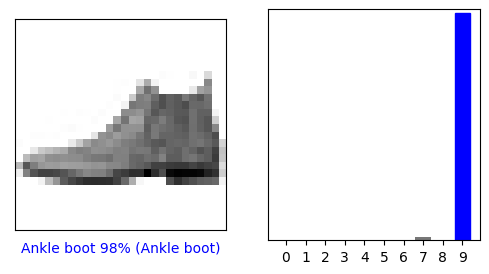

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

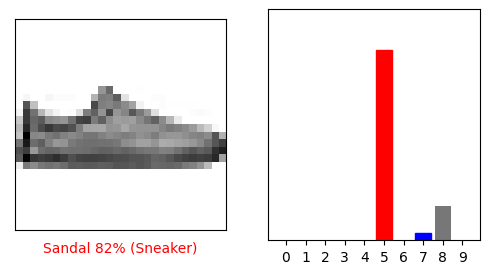

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

いくつかの画像をそれらの予測とともにプロットしてみましょう。確信度が高い場合でも、モデルが間違っていることがあることに注意してください。

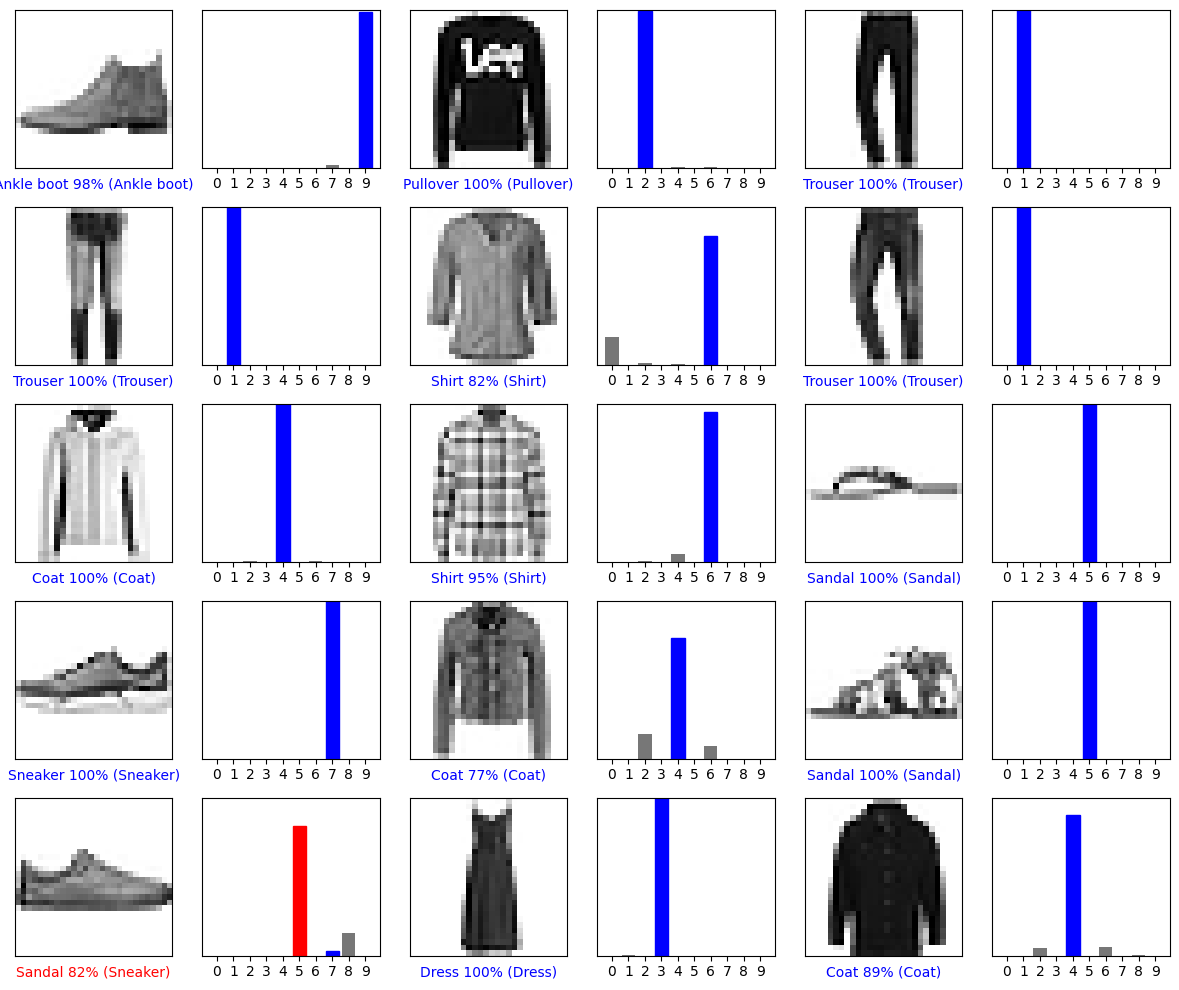

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## トレーニングされたモデルを使用する

最後に、トレーニング済みモデルを使って 1 つの画像に対する予測を行います。

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` モデルは、サンプルの中のバッチあるいは「集まり」についてまとめて予測を行うように最適化されています。そのため、1 つの画像を使う場合でも、リスト化する必要があります。

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


そして、予測を行います。

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 24ms/step


[[2.4473981e-04 1.2069421e-11 9.9653888e-01 2.1565708e-14 1.3155717e-03
  2.2960410e-12 1.9008714e-03 8.9515721e-13 2.3349067e-10 3.9004930e-16]]


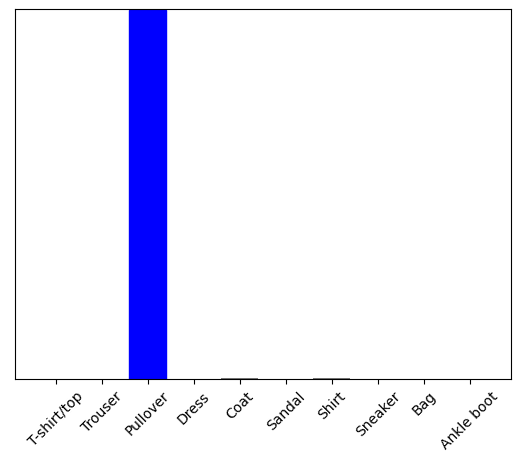

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` は、リストのリストを返します。リストの要素のそれぞれが、バッチの中の画像に対応します。バッチの中から、(といってもバッチの中身は１つだけですが) 予測を取り出します。

In [31]:
np.argmax(predictions_single[0])

2

モデルは期待どおりにラベルを予測しました。